# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 23.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 16.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 24.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_token_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp9 # use or create a database named demo
tweet_collection = db.final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = '] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.77986,-122.42905,200mi"  # defin the location, in Harrisonburg, VA
q = "COVID-19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [13]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Dec 13 19:26:05 +0000 2020'
'Sun Dec 13 19:25:59 +0000 2020'
'Sun Dec 13 19:25:53 +0000 2020'
'Sun Dec 13 19:25:53 +0000 2020'
'Sun Dec 13 19:25:45 +0000 2020'
'Sun Dec 13 19:25:38 +0000 2020'
'Sun Dec 13 19:25:38 +0000 2020'
'Sun Dec 13 19:25:32 +0000 2020'
'Sun Dec 13 19:25:29 +0000 2020'
'Sun Dec 13 19:25:14 +0000 2020'
'Sun Dec 13 19:25:10 +0000 2020'
'Sun Dec 13 19:25:07 +0000 2020'
'Sun Dec 13 19:25:01 +0000 2020'
'Sun Dec 13 19:25:01 +0000 2020'
'Sun Dec 13 19:24:59 +0000 2020'
'Sun Dec 13 19:24:57 +0000 2020'
'Sun Dec 13 19:24:57 +0000 2020'
'Sun Dec 13 19:24:50 +0000 2020'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Dec 13 19:17:18 +0000 2020'
'Sun Dec 13 19:16:55 +0000 2020'
'Sun Dec 13 19:16:48 +0000 2020'
'Sun Dec 13 19:16:48 +0000 2020'
'Sun Dec 13 19:16:43 +0000 2020'
'Sun Dec 13 19:16:33 +0000 2020'
'Sun Dec 13 19:16:28 +0000 2020'
'Sun Dec 13 19:16:25 +0000 2020'
'Sun Dec 13 19:16:23 +0000 2020'
'Sun Dec 13 19:16:05 +0000 2020'
'Sun Dec 13 19:16:02 +0000 2020'
'Sun Dec 13 19:16:02 +0000 2020'
'Sun Dec 13 19:15:52 +0000 2020'
'Sun Dec 13 19:15:45 +0000 2020'
'Sun Dec 13 19:15:44 +0000 2020'
'Sun Dec 13 19:15:44 +0000 2020'
'Sun Dec 13 19:15:43 +0000 2020'
'Sun Dec 13 19:15:38 +0000 2020'
'Sun Dec 13 19:15:34 +0000 2020'
'Sun Dec 13 19:15:28 +0000 2020'
'Sun Dec 13 19:15:28 +0000 2020'
'Sun Dec 13 19:15:20 +0000 2020'
'Sun Dec 13 19:15:19 +0000 2020'
'Sun Dec 13 19:15:14 +0000 2020'
'Sun Dec 13 19:15:14 +0000 2020'
'Sun Dec 13 19:15:09 +0000 2020'
'Sun Dec 13 19:15:05 +0000 2020'
'Sun Dec 13 19:15:02 +0000 2020'
'Sun Dec 13 19:14:58 +0000 2020'
'Sun Dec 13 19:14:57 +0000 2020'
'Sun Dec 1

'Sun Dec 13 18:59:40 +0000 2020'
'Sun Dec 13 18:59:32 +0000 2020'
'Sun Dec 13 18:59:31 +0000 2020'
'Sun Dec 13 18:59:30 +0000 2020'
'Sun Dec 13 18:59:24 +0000 2020'
'Sun Dec 13 18:59:24 +0000 2020'
'Sun Dec 13 18:59:15 +0000 2020'
'Sun Dec 13 18:59:09 +0000 2020'
'Sun Dec 13 18:58:58 +0000 2020'
'Sun Dec 13 18:58:55 +0000 2020'
'Sun Dec 13 18:58:54 +0000 2020'
'Sun Dec 13 18:58:51 +0000 2020'
'Sun Dec 13 18:58:48 +0000 2020'
'Sun Dec 13 18:58:46 +0000 2020'
'Sun Dec 13 18:58:44 +0000 2020'
'Sun Dec 13 18:58:38 +0000 2020'
'Sun Dec 13 18:58:31 +0000 2020'
'Sun Dec 13 18:58:25 +0000 2020'
'Sun Dec 13 18:58:22 +0000 2020'
'Sun Dec 13 18:58:18 +0000 2020'
'Sun Dec 13 18:57:56 +0000 2020'
'Sun Dec 13 18:57:56 +0000 2020'
'Sun Dec 13 18:57:55 +0000 2020'
'Sun Dec 13 18:57:52 +0000 2020'
'Sun Dec 13 18:57:45 +0000 2020'
'Sun Dec 13 18:57:43 +0000 2020'
'Sun Dec 13 18:57:43 +0000 2020'
'Sun Dec 13 18:57:42 +0000 2020'
'Sun Dec 13 18:57:27 +0000 2020'
'Sun Dec 13 18:57:22 +0000 2020'
'Sun Dec 1

'Sun Dec 13 18:41:46 +0000 2020'
'Sun Dec 13 18:41:37 +0000 2020'
'Sun Dec 13 18:41:34 +0000 2020'
'Sun Dec 13 18:41:31 +0000 2020'
'Sun Dec 13 18:41:21 +0000 2020'
'Sun Dec 13 18:41:18 +0000 2020'
'Sun Dec 13 18:41:11 +0000 2020'
'Sun Dec 13 18:41:00 +0000 2020'
'Sun Dec 13 18:40:56 +0000 2020'
'Sun Dec 13 18:40:44 +0000 2020'
'Sun Dec 13 18:40:40 +0000 2020'
'Sun Dec 13 18:40:33 +0000 2020'
'Sun Dec 13 18:40:26 +0000 2020'
'Sun Dec 13 18:40:24 +0000 2020'
'Sun Dec 13 18:40:22 +0000 2020'
'Sun Dec 13 18:40:02 +0000 2020'
'Sun Dec 13 18:39:50 +0000 2020'
'Sun Dec 13 18:39:49 +0000 2020'
'Sun Dec 13 18:39:47 +0000 2020'
'Sun Dec 13 18:39:46 +0000 2020'
'Sun Dec 13 18:39:46 +0000 2020'
'Sun Dec 13 18:39:39 +0000 2020'
'Sun Dec 13 18:39:38 +0000 2020'
'Sun Dec 13 18:39:37 +0000 2020'
'Sun Dec 13 18:39:33 +0000 2020'
'Sun Dec 13 18:39:33 +0000 2020'
'Sun Dec 13 18:39:23 +0000 2020'
'Sun Dec 13 18:39:22 +0000 2020'
'Sun Dec 13 18:39:16 +0000 2020'
'Sun Dec 13 18:39:15 +0000 2020'
'Sun Dec 1

'Sun Dec 13 18:22:39 +0000 2020'
'Sun Dec 13 18:22:38 +0000 2020'
'Sun Dec 13 18:22:36 +0000 2020'
'Sun Dec 13 18:22:35 +0000 2020'
'Sun Dec 13 18:22:28 +0000 2020'
'Sun Dec 13 18:22:28 +0000 2020'
'Sun Dec 13 18:22:24 +0000 2020'
'Sun Dec 13 18:22:20 +0000 2020'
'Sun Dec 13 18:22:20 +0000 2020'
'Sun Dec 13 18:22:19 +0000 2020'
'Sun Dec 13 18:22:18 +0000 2020'
'Sun Dec 13 18:22:16 +0000 2020'
'Sun Dec 13 18:22:16 +0000 2020'
'Sun Dec 13 18:22:13 +0000 2020'
'Sun Dec 13 18:22:12 +0000 2020'
'Sun Dec 13 18:22:07 +0000 2020'
'Sun Dec 13 18:22:06 +0000 2020'
'Sun Dec 13 18:22:06 +0000 2020'
'Sun Dec 13 18:22:04 +0000 2020'
'Sun Dec 13 18:21:59 +0000 2020'
'Sun Dec 13 18:21:58 +0000 2020'
'Sun Dec 13 18:21:57 +0000 2020'
'Sun Dec 13 18:21:54 +0000 2020'
'Sun Dec 13 18:21:53 +0000 2020'
'Sun Dec 13 18:21:50 +0000 2020'
'Sun Dec 13 18:21:48 +0000 2020'
'Sun Dec 13 18:21:47 +0000 2020'
'Sun Dec 13 18:21:31 +0000 2020'
'Sun Dec 13 18:21:28 +0000 2020'
'Sun Dec 13 18:21:25 +0000 2020'
'Sun Dec 1

'Sun Dec 13 18:03:20 +0000 2020'
'Sun Dec 13 18:03:20 +0000 2020'
'Sun Dec 13 18:03:14 +0000 2020'
'Sun Dec 13 18:03:05 +0000 2020'
'Sun Dec 13 18:03:05 +0000 2020'
'Sun Dec 13 18:03:04 +0000 2020'
'Sun Dec 13 18:03:03 +0000 2020'
'Sun Dec 13 18:02:43 +0000 2020'
'Sun Dec 13 18:02:35 +0000 2020'
'Sun Dec 13 18:02:31 +0000 2020'
'Sun Dec 13 18:02:19 +0000 2020'
'Sun Dec 13 18:02:17 +0000 2020'
'Sun Dec 13 18:02:16 +0000 2020'
'Sun Dec 13 18:02:12 +0000 2020'
'Sun Dec 13 18:02:09 +0000 2020'
'Sun Dec 13 18:01:58 +0000 2020'
'Sun Dec 13 18:01:54 +0000 2020'
'Sun Dec 13 18:01:54 +0000 2020'
'Sun Dec 13 18:01:52 +0000 2020'
'Sun Dec 13 18:01:52 +0000 2020'
'Sun Dec 13 18:01:51 +0000 2020'
'Sun Dec 13 18:01:44 +0000 2020'
'Sun Dec 13 18:01:40 +0000 2020'
'Sun Dec 13 18:01:36 +0000 2020'
'Sun Dec 13 18:01:34 +0000 2020'
'Sun Dec 13 18:01:28 +0000 2020'
'Sun Dec 13 18:01:24 +0000 2020'
'Sun Dec 13 18:01:24 +0000 2020'
'Sun Dec 13 18:01:16 +0000 2020'
'Sun Dec 13 18:01:14 +0000 2020'
'Sun Dec 1

'Sun Dec 13 17:45:01 +0000 2020'
'Sun Dec 13 17:44:52 +0000 2020'
'Sun Dec 13 17:44:44 +0000 2020'
'Sun Dec 13 17:44:36 +0000 2020'
'Sun Dec 13 17:44:31 +0000 2020'
'Sun Dec 13 17:44:28 +0000 2020'
'Sun Dec 13 17:44:23 +0000 2020'
'Sun Dec 13 17:44:21 +0000 2020'
'Sun Dec 13 17:44:19 +0000 2020'
'Sun Dec 13 17:44:18 +0000 2020'
'Sun Dec 13 17:44:16 +0000 2020'
'Sun Dec 13 17:44:16 +0000 2020'
'Sun Dec 13 17:44:15 +0000 2020'
'Sun Dec 13 17:44:10 +0000 2020'
'Sun Dec 13 17:44:03 +0000 2020'
'Sun Dec 13 17:44:02 +0000 2020'
'Sun Dec 13 17:43:57 +0000 2020'
'Sun Dec 13 17:43:57 +0000 2020'
'Sun Dec 13 17:43:55 +0000 2020'
'Sun Dec 13 17:43:54 +0000 2020'
'Sun Dec 13 17:43:47 +0000 2020'
'Sun Dec 13 17:43:47 +0000 2020'
'Sun Dec 13 17:43:43 +0000 2020'
'Sun Dec 13 17:43:37 +0000 2020'
'Sun Dec 13 17:43:34 +0000 2020'
'Sun Dec 13 17:43:31 +0000 2020'
'Sun Dec 13 17:43:30 +0000 2020'
'Sun Dec 13 17:43:30 +0000 2020'
'Sun Dec 13 17:43:26 +0000 2020'
'Sun Dec 13 17:43:13 +0000 2020'
'Sun Dec 1

'Sun Dec 13 17:28:10 +0000 2020'
'Sun Dec 13 17:28:09 +0000 2020'
'Sun Dec 13 17:28:03 +0000 2020'
'Sun Dec 13 17:28:03 +0000 2020'
'Sun Dec 13 17:28:02 +0000 2020'
'Sun Dec 13 17:27:59 +0000 2020'
'Sun Dec 13 17:27:55 +0000 2020'
'Sun Dec 13 17:27:53 +0000 2020'
'Sun Dec 13 17:27:51 +0000 2020'
'Sun Dec 13 17:27:49 +0000 2020'
'Sun Dec 13 17:27:46 +0000 2020'
'Sun Dec 13 17:27:46 +0000 2020'
'Sun Dec 13 17:27:44 +0000 2020'
'Sun Dec 13 17:27:31 +0000 2020'
'Sun Dec 13 17:27:24 +0000 2020'
'Sun Dec 13 17:27:19 +0000 2020'
'Sun Dec 13 17:27:17 +0000 2020'
'Sun Dec 13 17:27:16 +0000 2020'
'Sun Dec 13 17:27:12 +0000 2020'
'Sun Dec 13 17:27:09 +0000 2020'
'Sun Dec 13 17:27:08 +0000 2020'
'Sun Dec 13 17:27:07 +0000 2020'
'Sun Dec 13 17:26:59 +0000 2020'
'Sun Dec 13 17:26:52 +0000 2020'
'Sun Dec 13 17:26:51 +0000 2020'
'Sun Dec 13 17:26:51 +0000 2020'
'Sun Dec 13 17:26:50 +0000 2020'
'Sun Dec 13 17:26:49 +0000 2020'
'Sun Dec 13 17:26:34 +0000 2020'
'Sun Dec 13 17:26:32 +0000 2020'
'Sun Dec 1

'Sun Dec 13 17:11:47 +0000 2020'
'Sun Dec 13 17:11:44 +0000 2020'
'Sun Dec 13 17:11:35 +0000 2020'
'Sun Dec 13 17:11:27 +0000 2020'
'Sun Dec 13 17:11:27 +0000 2020'
'Sun Dec 13 17:11:24 +0000 2020'
'Sun Dec 13 17:11:24 +0000 2020'
'Sun Dec 13 17:11:23 +0000 2020'
'Sun Dec 13 17:11:21 +0000 2020'
'Sun Dec 13 17:11:18 +0000 2020'
'Sun Dec 13 17:11:17 +0000 2020'
'Sun Dec 13 17:11:16 +0000 2020'
'Sun Dec 13 17:11:14 +0000 2020'
'Sun Dec 13 17:11:10 +0000 2020'
'Sun Dec 13 17:11:08 +0000 2020'
'Sun Dec 13 17:10:59 +0000 2020'
'Sun Dec 13 17:10:58 +0000 2020'
'Sun Dec 13 17:10:56 +0000 2020'
'Sun Dec 13 17:10:56 +0000 2020'
'Sun Dec 13 17:10:55 +0000 2020'
'Sun Dec 13 17:10:49 +0000 2020'
'Sun Dec 13 17:10:48 +0000 2020'
'Sun Dec 13 17:10:46 +0000 2020'
'Sun Dec 13 17:10:45 +0000 2020'
'Sun Dec 13 17:10:43 +0000 2020'
'Sun Dec 13 17:10:42 +0000 2020'
'Sun Dec 13 17:10:41 +0000 2020'
'Sun Dec 13 17:10:37 +0000 2020'
'Sun Dec 13 17:10:29 +0000 2020'
'Sun Dec 13 17:10:27 +0000 2020'
'Sun Dec 1

'Sun Dec 13 16:59:38 +0000 2020'
'Sun Dec 13 16:59:38 +0000 2020'
'Sun Dec 13 16:59:36 +0000 2020'
'Sun Dec 13 16:59:36 +0000 2020'
'Sun Dec 13 16:59:33 +0000 2020'
'Sun Dec 13 16:59:26 +0000 2020'
'Sun Dec 13 16:59:22 +0000 2020'
'Sun Dec 13 16:59:16 +0000 2020'
'Sun Dec 13 16:59:15 +0000 2020'
'Sun Dec 13 16:59:13 +0000 2020'
'Sun Dec 13 16:59:12 +0000 2020'
'Sun Dec 13 16:59:11 +0000 2020'
'Sun Dec 13 16:59:11 +0000 2020'
'Sun Dec 13 16:59:03 +0000 2020'
'Sun Dec 13 16:59:01 +0000 2020'
'Sun Dec 13 16:59:00 +0000 2020'
'Sun Dec 13 16:58:58 +0000 2020'
'Sun Dec 13 16:58:48 +0000 2020'
'Sun Dec 13 16:58:39 +0000 2020'
'Sun Dec 13 16:58:30 +0000 2020'
'Sun Dec 13 16:58:30 +0000 2020'
'Sun Dec 13 16:58:29 +0000 2020'
'Sun Dec 13 16:58:29 +0000 2020'
'Sun Dec 13 16:58:22 +0000 2020'
'Sun Dec 13 16:58:22 +0000 2020'
'Sun Dec 13 16:58:20 +0000 2020'
'Sun Dec 13 16:58:17 +0000 2020'
'Sun Dec 13 16:58:16 +0000 2020'
'Sun Dec 13 16:58:02 +0000 2020'
'Sun Dec 13 16:57:56 +0000 2020'
'Sun Dec 1

'Sun Dec 13 16:46:41 +0000 2020'
'Sun Dec 13 16:46:34 +0000 2020'
'Sun Dec 13 16:46:31 +0000 2020'
'Sun Dec 13 16:46:26 +0000 2020'
'Sun Dec 13 16:46:23 +0000 2020'
'Sun Dec 13 16:46:15 +0000 2020'
'Sun Dec 13 16:46:13 +0000 2020'
'Sun Dec 13 16:46:11 +0000 2020'
'Sun Dec 13 16:46:04 +0000 2020'
'Sun Dec 13 16:46:01 +0000 2020'
'Sun Dec 13 16:45:58 +0000 2020'
'Sun Dec 13 16:45:53 +0000 2020'
'Sun Dec 13 16:45:36 +0000 2020'
'Sun Dec 13 16:45:35 +0000 2020'
'Sun Dec 13 16:45:33 +0000 2020'
'Sun Dec 13 16:45:26 +0000 2020'
'Sun Dec 13 16:45:22 +0000 2020'
'Sun Dec 13 16:45:17 +0000 2020'
'Sun Dec 13 16:45:12 +0000 2020'
'Sun Dec 13 16:45:12 +0000 2020'
'Sun Dec 13 16:45:05 +0000 2020'
'Sun Dec 13 16:45:00 +0000 2020'
'Sun Dec 13 16:45:00 +0000 2020'
'Sun Dec 13 16:44:57 +0000 2020'
'Sun Dec 13 16:44:56 +0000 2020'
'Sun Dec 13 16:44:55 +0000 2020'
'Sun Dec 13 16:44:51 +0000 2020'
'Sun Dec 13 16:44:51 +0000 2020'
'Sun Dec 13 16:44:42 +0000 2020'
'Sun Dec 13 16:44:41 +0000 2020'
'Sun Dec 1

'Sun Dec 13 16:34:11 +0000 2020'
'Sun Dec 13 16:34:10 +0000 2020'
'Sun Dec 13 16:34:08 +0000 2020'
'Sun Dec 13 16:34:06 +0000 2020'
'Sun Dec 13 16:34:04 +0000 2020'
'Sun Dec 13 16:34:02 +0000 2020'
'Sun Dec 13 16:34:00 +0000 2020'
'Sun Dec 13 16:34:00 +0000 2020'
'Sun Dec 13 16:33:55 +0000 2020'
'Sun Dec 13 16:33:52 +0000 2020'
'Sun Dec 13 16:33:51 +0000 2020'
'Sun Dec 13 16:33:47 +0000 2020'
'Sun Dec 13 16:33:46 +0000 2020'
'Sun Dec 13 16:33:44 +0000 2020'
'Sun Dec 13 16:33:43 +0000 2020'
'Sun Dec 13 16:33:42 +0000 2020'
'Sun Dec 13 16:33:41 +0000 2020'
'Sun Dec 13 16:33:34 +0000 2020'
'Sun Dec 13 16:33:34 +0000 2020'
'Sun Dec 13 16:33:31 +0000 2020'
'Sun Dec 13 16:33:31 +0000 2020'
'Sun Dec 13 16:33:29 +0000 2020'
'Sun Dec 13 16:33:27 +0000 2020'
'Sun Dec 13 16:33:27 +0000 2020'
'Sun Dec 13 16:33:24 +0000 2020'
'Sun Dec 13 16:33:23 +0000 2020'
'Sun Dec 13 16:33:23 +0000 2020'
'Sun Dec 13 16:33:23 +0000 2020'
'Sun Dec 13 16:33:22 +0000 2020'
'Sun Dec 13 16:33:21 +0000 2020'
'Sun Dec 1

'Sun Dec 13 16:25:15 +0000 2020'
'Sun Dec 13 16:25:15 +0000 2020'
'Sun Dec 13 16:25:11 +0000 2020'
'Sun Dec 13 16:25:10 +0000 2020'
'Sun Dec 13 16:25:08 +0000 2020'
'Sun Dec 13 16:25:04 +0000 2020'
'Sun Dec 13 16:25:03 +0000 2020'
'Sun Dec 13 16:25:01 +0000 2020'
'Sun Dec 13 16:24:58 +0000 2020'
'Sun Dec 13 16:24:54 +0000 2020'
'Sun Dec 13 16:24:42 +0000 2020'
'Sun Dec 13 16:24:41 +0000 2020'
'Sun Dec 13 16:24:35 +0000 2020'
'Sun Dec 13 16:24:25 +0000 2020'
'Sun Dec 13 16:24:22 +0000 2020'
'Sun Dec 13 16:24:21 +0000 2020'
'Sun Dec 13 16:24:15 +0000 2020'
'Sun Dec 13 16:24:04 +0000 2020'
'Sun Dec 13 16:24:04 +0000 2020'
'Sun Dec 13 16:23:57 +0000 2020'
'Sun Dec 13 16:23:52 +0000 2020'
'Sun Dec 13 16:23:52 +0000 2020'
'Sun Dec 13 16:23:48 +0000 2020'
'Sun Dec 13 16:23:47 +0000 2020'
'Sun Dec 13 16:23:44 +0000 2020'
'Sun Dec 13 16:23:43 +0000 2020'
'Sun Dec 13 16:23:37 +0000 2020'
'Sun Dec 13 16:23:37 +0000 2020'
'Sun Dec 13 16:23:36 +0000 2020'
'Sun Dec 13 16:23:29 +0000 2020'
'Sun Dec 1

'Sun Dec 13 16:09:51 +0000 2020'
'Sun Dec 13 16:09:51 +0000 2020'
'Sun Dec 13 16:09:48 +0000 2020'
'Sun Dec 13 16:09:40 +0000 2020'
'Sun Dec 13 16:09:37 +0000 2020'
'Sun Dec 13 16:09:29 +0000 2020'
'Sun Dec 13 16:09:21 +0000 2020'
'Sun Dec 13 16:09:21 +0000 2020'
'Sun Dec 13 16:09:21 +0000 2020'
'Sun Dec 13 16:09:19 +0000 2020'
'Sun Dec 13 16:09:00 +0000 2020'
'Sun Dec 13 16:08:57 +0000 2020'
'Sun Dec 13 16:08:40 +0000 2020'
'Sun Dec 13 16:08:28 +0000 2020'
'Sun Dec 13 16:08:25 +0000 2020'
'Sun Dec 13 16:08:24 +0000 2020'
'Sun Dec 13 16:08:22 +0000 2020'
'Sun Dec 13 16:08:13 +0000 2020'
'Sun Dec 13 16:08:08 +0000 2020'
'Sun Dec 13 16:08:06 +0000 2020'
'Sun Dec 13 16:08:01 +0000 2020'
'Sun Dec 13 16:07:50 +0000 2020'
'Sun Dec 13 16:07:43 +0000 2020'
'Sun Dec 13 16:07:40 +0000 2020'
'Sun Dec 13 16:07:37 +0000 2020'
'Sun Dec 13 16:07:35 +0000 2020'
'Sun Dec 13 16:07:30 +0000 2020'
'Sun Dec 13 16:07:27 +0000 2020'
'Sun Dec 13 16:07:27 +0000 2020'
'Sun Dec 13 16:07:26 +0000 2020'
'Sun Dec 1

'Sun Dec 13 15:50:48 +0000 2020'
'Sun Dec 13 15:50:46 +0000 2020'
'Sun Dec 13 15:50:42 +0000 2020'
'Sun Dec 13 15:50:42 +0000 2020'
'Sun Dec 13 15:50:40 +0000 2020'
'Sun Dec 13 15:50:34 +0000 2020'
'Sun Dec 13 15:50:34 +0000 2020'
'Sun Dec 13 15:50:31 +0000 2020'
'Sun Dec 13 15:50:28 +0000 2020'
'Sun Dec 13 15:50:26 +0000 2020'
'Sun Dec 13 15:50:24 +0000 2020'
'Sun Dec 13 15:50:22 +0000 2020'
'Sun Dec 13 15:50:20 +0000 2020'
'Sun Dec 13 15:50:20 +0000 2020'
'Sun Dec 13 15:50:18 +0000 2020'
'Sun Dec 13 15:50:15 +0000 2020'
'Sun Dec 13 15:50:12 +0000 2020'
'Sun Dec 13 15:50:10 +0000 2020'
'Sun Dec 13 15:49:59 +0000 2020'
'Sun Dec 13 15:49:54 +0000 2020'
'Sun Dec 13 15:49:48 +0000 2020'
'Sun Dec 13 15:49:43 +0000 2020'
'Sun Dec 13 15:49:39 +0000 2020'
'Sun Dec 13 15:49:37 +0000 2020'
'Sun Dec 13 15:49:37 +0000 2020'
'Sun Dec 13 15:49:34 +0000 2020'
'Sun Dec 13 15:49:33 +0000 2020'
'Sun Dec 13 15:49:32 +0000 2020'
'Sun Dec 13 15:49:30 +0000 2020'
'Sun Dec 13 15:49:23 +0000 2020'
'Sun Dec 1

'Sun Dec 13 15:30:14 +0000 2020'
'Sun Dec 13 15:30:12 +0000 2020'
'Sun Dec 13 15:30:09 +0000 2020'
'Sun Dec 13 15:29:42 +0000 2020'
'Sun Dec 13 15:29:32 +0000 2020'
'Sun Dec 13 15:29:32 +0000 2020'
'Sun Dec 13 15:29:32 +0000 2020'
'Sun Dec 13 15:29:29 +0000 2020'
'Sun Dec 13 15:29:29 +0000 2020'
'Sun Dec 13 15:29:25 +0000 2020'
'Sun Dec 13 15:29:24 +0000 2020'
'Sun Dec 13 15:29:23 +0000 2020'
'Sun Dec 13 15:29:10 +0000 2020'
'Sun Dec 13 15:29:07 +0000 2020'
'Sun Dec 13 15:28:53 +0000 2020'
'Sun Dec 13 15:28:52 +0000 2020'
'Sun Dec 13 15:28:28 +0000 2020'
'Sun Dec 13 15:28:28 +0000 2020'
'Sun Dec 13 15:28:25 +0000 2020'
'Sun Dec 13 15:28:11 +0000 2020'
'Sun Dec 13 15:28:10 +0000 2020'
'Sun Dec 13 15:28:04 +0000 2020'
'Sun Dec 13 15:27:43 +0000 2020'
'Sun Dec 13 15:27:30 +0000 2020'
'Sun Dec 13 15:27:22 +0000 2020'
'Sun Dec 13 15:27:17 +0000 2020'
'Sun Dec 13 15:27:05 +0000 2020'
'Sun Dec 13 15:26:52 +0000 2020'
'Sun Dec 13 15:26:31 +0000 2020'
'Sun Dec 13 15:26:21 +0000 2020'
'Sun Dec 1

'Sun Dec 13 15:00:15 +0000 2020'
'Sun Dec 13 15:00:09 +0000 2020'
'Sun Dec 13 15:00:00 +0000 2020'
'Sun Dec 13 14:59:59 +0000 2020'
'Sun Dec 13 14:59:57 +0000 2020'
'Sun Dec 13 14:59:56 +0000 2020'
'Sun Dec 13 14:59:52 +0000 2020'
'Sun Dec 13 14:59:49 +0000 2020'
'Sun Dec 13 14:59:48 +0000 2020'
'Sun Dec 13 14:59:48 +0000 2020'
'Sun Dec 13 14:59:36 +0000 2020'
'Sun Dec 13 14:59:34 +0000 2020'
'Sun Dec 13 14:59:08 +0000 2020'
'Sun Dec 13 14:59:06 +0000 2020'
'Sun Dec 13 14:59:05 +0000 2020'
'Sun Dec 13 14:59:04 +0000 2020'
'Sun Dec 13 14:59:02 +0000 2020'
'Sun Dec 13 14:58:59 +0000 2020'
'Sun Dec 13 14:58:51 +0000 2020'
'Sun Dec 13 14:58:50 +0000 2020'
'Sun Dec 13 14:58:41 +0000 2020'
'Sun Dec 13 14:58:41 +0000 2020'
'Sun Dec 13 14:58:33 +0000 2020'
'Sun Dec 13 14:58:30 +0000 2020'
'Sun Dec 13 14:58:19 +0000 2020'
'Sun Dec 13 14:58:13 +0000 2020'
'Sun Dec 13 14:58:04 +0000 2020'
'Sun Dec 13 14:58:03 +0000 2020'
'Sun Dec 13 14:58:00 +0000 2020'
'Sun Dec 13 14:57:51 +0000 2020'
'Sun Dec 1

'Sun Dec 13 14:19:21 +0000 2020'
'Sun Dec 13 14:19:08 +0000 2020'
'Sun Dec 13 14:18:56 +0000 2020'
'Sun Dec 13 14:18:53 +0000 2020'
'Sun Dec 13 14:18:25 +0000 2020'
'Sun Dec 13 14:17:41 +0000 2020'
'Sun Dec 13 14:17:41 +0000 2020'
'Sun Dec 13 14:17:38 +0000 2020'
'Sun Dec 13 14:16:45 +0000 2020'
'Sun Dec 13 14:16:43 +0000 2020'
'Sun Dec 13 14:16:43 +0000 2020'
'Sun Dec 13 14:16:34 +0000 2020'
'Sun Dec 13 14:16:16 +0000 2020'
'Sun Dec 13 14:16:04 +0000 2020'
'Sun Dec 13 14:16:03 +0000 2020'
'Sun Dec 13 14:16:02 +0000 2020'
'Sun Dec 13 14:15:58 +0000 2020'
'Sun Dec 13 14:15:54 +0000 2020'
'Sun Dec 13 14:15:46 +0000 2020'
'Sun Dec 13 14:15:44 +0000 2020'
'Sun Dec 13 14:15:38 +0000 2020'
'Sun Dec 13 14:15:21 +0000 2020'
'Sun Dec 13 14:15:05 +0000 2020'
'Sun Dec 13 14:15:00 +0000 2020'
'Sun Dec 13 14:14:52 +0000 2020'
'Sun Dec 13 14:14:43 +0000 2020'
'Sun Dec 13 14:14:39 +0000 2020'
'Sun Dec 13 14:14:38 +0000 2020'
'Sun Dec 13 14:14:22 +0000 2020'
'Sun Dec 13 14:14:09 +0000 2020'
'Sun Dec 1

'Sun Dec 13 13:29:51 +0000 2020'
'Sun Dec 13 13:29:16 +0000 2020'
'Sun Dec 13 13:29:04 +0000 2020'
'Sun Dec 13 13:29:03 +0000 2020'
'Sun Dec 13 13:28:52 +0000 2020'
'Sun Dec 13 13:28:50 +0000 2020'
'Sun Dec 13 13:28:03 +0000 2020'
'Sun Dec 13 13:27:49 +0000 2020'
'Sun Dec 13 13:27:06 +0000 2020'
'Sun Dec 13 13:27:05 +0000 2020'
'Sun Dec 13 13:26:46 +0000 2020'
'Sun Dec 13 13:26:40 +0000 2020'
'Sun Dec 13 13:26:19 +0000 2020'
'Sun Dec 13 13:26:14 +0000 2020'
'Sun Dec 13 13:25:58 +0000 2020'
'Sun Dec 13 13:25:51 +0000 2020'
'Sun Dec 13 13:25:41 +0000 2020'
'Sun Dec 13 13:25:28 +0000 2020'
'Sun Dec 13 13:25:12 +0000 2020'
'Sun Dec 13 13:25:00 +0000 2020'
'Sun Dec 13 13:24:56 +0000 2020'
'Sun Dec 13 13:24:35 +0000 2020'
'Sun Dec 13 13:24:30 +0000 2020'
'Sun Dec 13 13:24:21 +0000 2020'
'Sun Dec 13 13:24:18 +0000 2020'
'Sun Dec 13 13:24:16 +0000 2020'
'Sun Dec 13 13:23:51 +0000 2020'
'Sun Dec 13 13:23:50 +0000 2020'
'Sun Dec 13 13:23:49 +0000 2020'
'Sun Dec 13 13:23:26 +0000 2020'
'Sun Dec 1

'Sun Dec 13 11:54:14 +0000 2020'
'Sun Dec 13 11:53:49 +0000 2020'
'Sun Dec 13 11:52:37 +0000 2020'
'Sun Dec 13 11:52:33 +0000 2020'
'Sun Dec 13 11:51:56 +0000 2020'
'Sun Dec 13 11:51:12 +0000 2020'
'Sun Dec 13 11:50:59 +0000 2020'
'Sun Dec 13 11:50:52 +0000 2020'
'Sun Dec 13 11:50:48 +0000 2020'
'Sun Dec 13 11:50:30 +0000 2020'
'Sun Dec 13 11:49:26 +0000 2020'
'Sun Dec 13 11:49:11 +0000 2020'
'Sun Dec 13 11:48:51 +0000 2020'
'Sun Dec 13 11:48:19 +0000 2020'
'Sun Dec 13 11:47:41 +0000 2020'
'Sun Dec 13 11:47:21 +0000 2020'
'Sun Dec 13 11:47:20 +0000 2020'
'Sun Dec 13 11:44:59 +0000 2020'
'Sun Dec 13 11:44:27 +0000 2020'
'Sun Dec 13 11:43:55 +0000 2020'
'Sun Dec 13 11:43:16 +0000 2020'
'Sun Dec 13 11:43:04 +0000 2020'
'Sun Dec 13 11:42:47 +0000 2020'
'Sun Dec 13 11:40:59 +0000 2020'
'Sun Dec 13 11:38:55 +0000 2020'
'Sun Dec 13 11:38:42 +0000 2020'
'Sun Dec 13 11:38:10 +0000 2020'
'Sun Dec 13 11:37:49 +0000 2020'
'Sun Dec 13 11:36:16 +0000 2020'
'Sun Dec 13 11:36:02 +0000 2020'
'Sun Dec 1

'Sun Dec 13 08:55:59 +0000 2020'
'Sun Dec 13 08:55:58 +0000 2020'
'Sun Dec 13 08:55:23 +0000 2020'
'Sun Dec 13 08:54:51 +0000 2020'
'Sun Dec 13 08:53:39 +0000 2020'
'Sun Dec 13 08:53:29 +0000 2020'
'Sun Dec 13 08:53:21 +0000 2020'
'Sun Dec 13 08:52:18 +0000 2020'
'Sun Dec 13 08:52:15 +0000 2020'
'Sun Dec 13 08:51:37 +0000 2020'
'Sun Dec 13 08:49:42 +0000 2020'
'Sun Dec 13 08:49:31 +0000 2020'
'Sun Dec 13 08:49:29 +0000 2020'
'Sun Dec 13 08:49:27 +0000 2020'
'Sun Dec 13 08:49:27 +0000 2020'
'Sun Dec 13 08:49:25 +0000 2020'
'Sun Dec 13 08:47:48 +0000 2020'
'Sun Dec 13 08:47:43 +0000 2020'
'Sun Dec 13 08:47:31 +0000 2020'
'Sun Dec 13 08:47:29 +0000 2020'
'Sun Dec 13 08:47:14 +0000 2020'
'Sun Dec 13 08:46:27 +0000 2020'
'Sun Dec 13 08:45:56 +0000 2020'
'Sun Dec 13 08:45:55 +0000 2020'
'Sun Dec 13 08:44:56 +0000 2020'
'Sun Dec 13 08:44:43 +0000 2020'
'Sun Dec 13 08:44:32 +0000 2020'
'Sun Dec 13 08:43:39 +0000 2020'
'Sun Dec 13 08:42:44 +0000 2020'
'Sun Dec 13 08:41:49 +0000 2020'
'Sun Dec 1

'Sun Dec 13 07:06:40 +0000 2020'
'Sun Dec 13 07:06:13 +0000 2020'
'Sun Dec 13 07:06:06 +0000 2020'
'Sun Dec 13 07:06:05 +0000 2020'
'Sun Dec 13 07:05:51 +0000 2020'
'Sun Dec 13 07:05:50 +0000 2020'
'Sun Dec 13 07:05:32 +0000 2020'
'Sun Dec 13 07:05:15 +0000 2020'
'Sun Dec 13 07:04:44 +0000 2020'
'Sun Dec 13 07:04:30 +0000 2020'
'Sun Dec 13 07:04:26 +0000 2020'
'Sun Dec 13 07:03:59 +0000 2020'
'Sun Dec 13 07:03:41 +0000 2020'
'Sun Dec 13 07:02:54 +0000 2020'
'Sun Dec 13 07:02:53 +0000 2020'
'Sun Dec 13 07:02:42 +0000 2020'
'Sun Dec 13 07:02:39 +0000 2020'
'Sun Dec 13 07:02:26 +0000 2020'
'Sun Dec 13 07:02:15 +0000 2020'
'Sun Dec 13 07:01:25 +0000 2020'
'Sun Dec 13 07:01:08 +0000 2020'
'Sun Dec 13 07:01:02 +0000 2020'
'Sun Dec 13 07:00:49 +0000 2020'
'Sun Dec 13 07:00:34 +0000 2020'
'Sun Dec 13 07:00:33 +0000 2020'
'Sun Dec 13 07:00:26 +0000 2020'
'Sun Dec 13 06:59:43 +0000 2020'
'Sun Dec 13 06:59:34 +0000 2020'
'Sun Dec 13 06:59:15 +0000 2020'
'Sun Dec 13 06:58:37 +0000 2020'
'Sun Dec 1

'Sun Dec 13 05:38:28 +0000 2020'
'Sun Dec 13 05:38:17 +0000 2020'
'Sun Dec 13 05:38:08 +0000 2020'
'Sun Dec 13 05:38:01 +0000 2020'
'Sun Dec 13 05:37:49 +0000 2020'
'Sun Dec 13 05:36:45 +0000 2020'
'Sun Dec 13 05:36:34 +0000 2020'
'Sun Dec 13 05:36:31 +0000 2020'
'Sun Dec 13 05:35:54 +0000 2020'
'Sun Dec 13 05:35:31 +0000 2020'
'Sun Dec 13 05:35:30 +0000 2020'
'Sun Dec 13 05:35:24 +0000 2020'
'Sun Dec 13 05:35:17 +0000 2020'
'Sun Dec 13 05:35:07 +0000 2020'
'Sun Dec 13 05:34:03 +0000 2020'
'Sun Dec 13 05:33:46 +0000 2020'
'Sun Dec 13 05:33:45 +0000 2020'
'Sun Dec 13 05:33:43 +0000 2020'
'Sun Dec 13 05:33:41 +0000 2020'
'Sun Dec 13 05:33:16 +0000 2020'
'Sun Dec 13 05:32:45 +0000 2020'
'Sun Dec 13 05:32:19 +0000 2020'
'Sun Dec 13 05:32:17 +0000 2020'
'Sun Dec 13 05:32:12 +0000 2020'
'Sun Dec 13 05:32:11 +0000 2020'
'Sun Dec 13 05:32:03 +0000 2020'
'Sun Dec 13 05:31:31 +0000 2020'
'Sun Dec 13 05:31:11 +0000 2020'
'Sun Dec 13 05:31:08 +0000 2020'
'Sun Dec 13 05:31:04 +0000 2020'
'Sun Dec 1

'Sun Dec 13 04:14:14 +0000 2020'
'Sun Dec 13 04:13:28 +0000 2020'
'Sun Dec 13 04:12:54 +0000 2020'
'Sun Dec 13 04:12:51 +0000 2020'
'Sun Dec 13 04:12:15 +0000 2020'
'Sun Dec 13 04:12:03 +0000 2020'
'Sun Dec 13 04:10:45 +0000 2020'
'Sun Dec 13 04:10:26 +0000 2020'
'Sun Dec 13 04:10:18 +0000 2020'
'Sun Dec 13 04:09:52 +0000 2020'
'Sun Dec 13 04:09:51 +0000 2020'
'Sun Dec 13 04:08:44 +0000 2020'
'Sun Dec 13 04:08:17 +0000 2020'
'Sun Dec 13 04:08:05 +0000 2020'
'Sun Dec 13 04:08:03 +0000 2020'
'Sun Dec 13 04:08:02 +0000 2020'
'Sun Dec 13 04:07:27 +0000 2020'
'Sun Dec 13 04:07:22 +0000 2020'
'Sun Dec 13 04:07:20 +0000 2020'
'Sun Dec 13 04:06:30 +0000 2020'
'Sun Dec 13 04:06:02 +0000 2020'
'Sun Dec 13 04:05:03 +0000 2020'
'Sun Dec 13 04:04:04 +0000 2020'
'Sun Dec 13 04:03:23 +0000 2020'
'Sun Dec 13 04:02:52 +0000 2020'
'Sun Dec 13 04:02:00 +0000 2020'
'Sun Dec 13 04:01:52 +0000 2020'
'Sun Dec 13 04:01:42 +0000 2020'
'Sun Dec 13 04:01:09 +0000 2020'
'Sun Dec 13 04:00:14 +0000 2020'
'Sun Dec 1

'Sun Dec 13 02:43:05 +0000 2020'
'Sun Dec 13 02:42:31 +0000 2020'
'Sun Dec 13 02:42:02 +0000 2020'
'Sun Dec 13 02:41:18 +0000 2020'
'Sun Dec 13 02:41:06 +0000 2020'
'Sun Dec 13 02:40:27 +0000 2020'
'Sun Dec 13 02:40:02 +0000 2020'
'Sun Dec 13 02:39:50 +0000 2020'
'Sun Dec 13 02:39:41 +0000 2020'
'Sun Dec 13 02:39:36 +0000 2020'
'Sun Dec 13 02:39:25 +0000 2020'
'Sun Dec 13 02:39:08 +0000 2020'
'Sun Dec 13 02:39:05 +0000 2020'
'Sun Dec 13 02:38:39 +0000 2020'
'Sun Dec 13 02:38:24 +0000 2020'
'Sun Dec 13 02:38:05 +0000 2020'
'Sun Dec 13 02:37:46 +0000 2020'
'Sun Dec 13 02:37:26 +0000 2020'
'Sun Dec 13 02:37:25 +0000 2020'
'Sun Dec 13 02:37:11 +0000 2020'
'Sun Dec 13 02:37:09 +0000 2020'
'Sun Dec 13 02:36:55 +0000 2020'
'Sun Dec 13 02:36:35 +0000 2020'
'Sun Dec 13 02:36:34 +0000 2020'
'Sun Dec 13 02:36:16 +0000 2020'
'Sun Dec 13 02:35:53 +0000 2020'
'Sun Dec 13 02:35:44 +0000 2020'
'Sun Dec 13 02:35:34 +0000 2020'
'Sun Dec 13 02:35:22 +0000 2020'
'Sun Dec 13 02:35:09 +0000 2020'
'Sun Dec 1

'Sun Dec 13 01:18:40 +0000 2020'
'Sun Dec 13 01:18:03 +0000 2020'
'Sun Dec 13 01:17:52 +0000 2020'
'Sun Dec 13 01:16:43 +0000 2020'
'Sun Dec 13 01:16:17 +0000 2020'
'Sun Dec 13 01:15:52 +0000 2020'
'Sun Dec 13 01:15:23 +0000 2020'
'Sun Dec 13 01:15:20 +0000 2020'
'Sun Dec 13 01:14:55 +0000 2020'
'Sun Dec 13 01:14:52 +0000 2020'
'Sun Dec 13 01:14:30 +0000 2020'
'Sun Dec 13 01:14:26 +0000 2020'
'Sun Dec 13 01:13:38 +0000 2020'
'Sun Dec 13 01:13:32 +0000 2020'
'Sun Dec 13 01:13:05 +0000 2020'
'Sun Dec 13 01:13:01 +0000 2020'
'Sun Dec 13 01:12:46 +0000 2020'
'Sun Dec 13 01:12:42 +0000 2020'
'Sun Dec 13 01:12:39 +0000 2020'
'Sun Dec 13 01:11:59 +0000 2020'
'Sun Dec 13 01:11:50 +0000 2020'
'Sun Dec 13 01:10:59 +0000 2020'
'Sun Dec 13 01:10:55 +0000 2020'
'Sun Dec 13 01:10:55 +0000 2020'
'Sun Dec 13 01:10:44 +0000 2020'
'Sun Dec 13 01:09:18 +0000 2020'
'Sun Dec 13 01:08:57 +0000 2020'
'Sun Dec 13 01:08:49 +0000 2020'
'Sun Dec 13 01:08:11 +0000 2020'
'Sun Dec 13 01:08:09 +0000 2020'
'Sun Dec 1

'Sat Dec 12 23:42:11 +0000 2020'
'Sat Dec 12 23:41:53 +0000 2020'
'Sat Dec 12 23:41:22 +0000 2020'
'Sat Dec 12 23:41:09 +0000 2020'
'Sat Dec 12 23:40:48 +0000 2020'
'Sat Dec 12 23:40:38 +0000 2020'
'Sat Dec 12 23:39:49 +0000 2020'
'Sat Dec 12 23:39:48 +0000 2020'
'Sat Dec 12 23:39:48 +0000 2020'
'Sat Dec 12 23:39:44 +0000 2020'
'Sat Dec 12 23:37:33 +0000 2020'
'Sat Dec 12 23:37:13 +0000 2020'
'Sat Dec 12 23:37:12 +0000 2020'
'Sat Dec 12 23:36:46 +0000 2020'
'Sat Dec 12 23:36:40 +0000 2020'
'Sat Dec 12 23:36:32 +0000 2020'
'Sat Dec 12 23:36:16 +0000 2020'
'Sat Dec 12 23:36:12 +0000 2020'
'Sat Dec 12 23:36:08 +0000 2020'
'Sat Dec 12 23:35:07 +0000 2020'
'Sat Dec 12 23:34:56 +0000 2020'
'Sat Dec 12 23:34:40 +0000 2020'
'Sat Dec 12 23:34:34 +0000 2020'
'Sat Dec 12 23:34:04 +0000 2020'
'Sat Dec 12 23:34:02 +0000 2020'
'Sat Dec 12 23:33:53 +0000 2020'
'Sat Dec 12 23:33:47 +0000 2020'
'Sat Dec 12 23:33:21 +0000 2020'
'Sat Dec 12 23:33:09 +0000 2020'
'Sat Dec 12 23:33:08 +0000 2020'
'Sat Dec 1

'Sat Dec 12 22:17:26 +0000 2020'
'Sat Dec 12 22:16:37 +0000 2020'
'Sat Dec 12 22:16:00 +0000 2020'
'Sat Dec 12 22:15:06 +0000 2020'
'Sat Dec 12 22:14:54 +0000 2020'
'Sat Dec 12 22:14:50 +0000 2020'
'Sat Dec 12 22:14:50 +0000 2020'
'Sat Dec 12 22:14:23 +0000 2020'
'Sat Dec 12 22:14:12 +0000 2020'
'Sat Dec 12 22:14:10 +0000 2020'
'Sat Dec 12 22:14:06 +0000 2020'
'Sat Dec 12 22:14:00 +0000 2020'
'Sat Dec 12 22:13:47 +0000 2020'
'Sat Dec 12 22:13:28 +0000 2020'
'Sat Dec 12 22:13:25 +0000 2020'
'Sat Dec 12 22:13:15 +0000 2020'
'Sat Dec 12 22:12:52 +0000 2020'
'Sat Dec 12 22:12:43 +0000 2020'
'Sat Dec 12 22:12:37 +0000 2020'
'Sat Dec 12 22:12:14 +0000 2020'
'Sat Dec 12 22:12:05 +0000 2020'
'Sat Dec 12 22:11:50 +0000 2020'
'Sat Dec 12 22:11:09 +0000 2020'
'Sat Dec 12 22:11:04 +0000 2020'
'Sat Dec 12 22:10:53 +0000 2020'
'Sat Dec 12 22:10:27 +0000 2020'
'Sat Dec 12 22:10:12 +0000 2020'
'Sat Dec 12 22:09:47 +0000 2020'
'Sat Dec 12 22:09:31 +0000 2020'
'Sat Dec 12 22:09:25 +0000 2020'
'Sat Dec 1

'Sat Dec 12 21:06:14 +0000 2020'
'Sat Dec 12 21:06:07 +0000 2020'
'Sat Dec 12 21:05:58 +0000 2020'
'Sat Dec 12 21:05:03 +0000 2020'
'Sat Dec 12 21:05:01 +0000 2020'
'Sat Dec 12 21:05:00 +0000 2020'
'Sat Dec 12 21:04:45 +0000 2020'
'Sat Dec 12 21:04:43 +0000 2020'
'Sat Dec 12 21:04:29 +0000 2020'
'Sat Dec 12 21:04:25 +0000 2020'
'Sat Dec 12 21:04:25 +0000 2020'
'Sat Dec 12 21:04:15 +0000 2020'
'Sat Dec 12 21:04:08 +0000 2020'
'Sat Dec 12 21:04:04 +0000 2020'
'Sat Dec 12 21:03:58 +0000 2020'
'Sat Dec 12 21:03:54 +0000 2020'
'Sat Dec 12 21:03:51 +0000 2020'
'Sat Dec 12 21:03:44 +0000 2020'
'Sat Dec 12 21:03:43 +0000 2020'
'Sat Dec 12 21:03:41 +0000 2020'
'Sat Dec 12 21:03:38 +0000 2020'
'Sat Dec 12 21:03:33 +0000 2020'
'Sat Dec 12 21:03:23 +0000 2020'
'Sat Dec 12 21:03:22 +0000 2020'
'Sat Dec 12 21:03:21 +0000 2020'
'Sat Dec 12 21:03:10 +0000 2020'
'Sat Dec 12 21:03:08 +0000 2020'
'Sat Dec 12 21:02:57 +0000 2020'
'Sat Dec 12 21:02:52 +0000 2020'
'Sat Dec 12 21:02:45 +0000 2020'
'Sat Dec 1

'Sat Dec 12 19:57:22 +0000 2020'
'Sat Dec 12 19:57:15 +0000 2020'
'Sat Dec 12 19:56:59 +0000 2020'
'Sat Dec 12 19:56:06 +0000 2020'
'Sat Dec 12 19:55:03 +0000 2020'
'Sat Dec 12 19:55:02 +0000 2020'
'Sat Dec 12 19:54:40 +0000 2020'
'Sat Dec 12 19:54:26 +0000 2020'
'Sat Dec 12 19:54:21 +0000 2020'
'Sat Dec 12 19:53:06 +0000 2020'
'Sat Dec 12 19:52:48 +0000 2020'
'Sat Dec 12 19:52:41 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

7522
6719


Create a text index and print the Tweets containing specific keywords. 

In [9]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [10]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891425160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,en,1603891434193,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
3,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,und,1603891502091,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
4,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,und,1603891425389,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1603891440324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5f9970eaea281243abe9e8c6,Wed Oct 28 13:23:49 +0000 2020,1321442549379334144,1321442549379334144,RT @raquelmiranda89: Shelby County: you have t...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429644,1.316336e+18,1316335746702340097,{'created_at': 'Wed Oct 14 11:11:13 +0000 2020...,"{'url': 'https://t.co/AbysBKfi2s', 'expanded':...",NaN,NaN,NaN,NaN
7,5f9970f9ea281243abe9ea15,Wed Oct 28 13:24:04 +0000 2020,1321442610347737088,1321442610347737088,I'm not voting until a celebrity tweets a pict...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1603891444180,NaN,NaN,NaN,NaN,{'full_text': 'I'm not voting until a celebrit...,NaN,NaN,NaN
8,5f997133ea281243abe9ea5b,Wed Oct 28 13:25:02 +0000 2020,1321442853617164289,1321442853617164289,RT @kkjjPNW: You do not have to vote by mail i...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891502180,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
9,5f9970faea281243abe9ea39,Wed Oct 28 13:24:05 +0000 2020,1321442617138286594,1321442617138286594,RT @Carnage4Life: It’s easier for a white pers...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891445799,1.320028e+18,1320027534789140480,{'created_at': 'Sat Oct 24 15:41:03 +0000 2020...,"{'url': 'https://t.co/8u0q776vmb', 'expanded':...",NaN,NaN,NaN,NaN


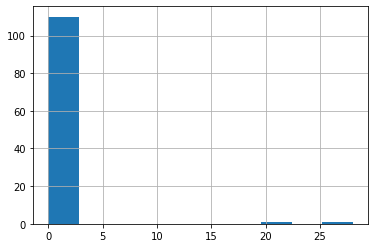

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count